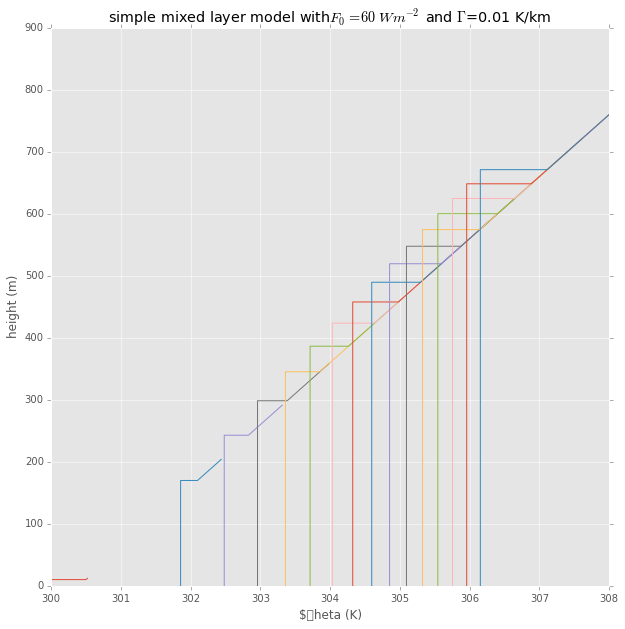

In [4]:
%matplotlib inline
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt
import pandas as pd


def dmixed_vars(the_vars,tstep,F0,wh,gamma):
    """
      derivatives for simple mixed layer (see mixed layer notes eqn. 11-13)
    """
    k=0.2
    rho=1.
    cp=1004.
    derivs=np.empty_like(the_vars)
    derivs[0]=(1 + k)*F0/(the_vars[1]*cp*rho)
    derivs[1] = k*F0/(rho*cp*the_vars[2]) + wh
    derivs[2] = (derivs[1] - wh)*gamma - derivs[0]
    return derivs

def make_prof(df_out,gamma):
    #
    #  construct a vertical (theta, height) profile with the correct Delta theta jump
    #  using four points
    #
    profile=[(df_out['theta'],0),
             (df_out['theta'],df_out['h']),
             (df_out['theta'] + df_out['deltheta'],df_out['h']),
             (df_out['theta'] + df_out['deltheta'] + gamma*0.2*df_out['h'],1.2*df_out['h'])]
    xvals=[item[0] for item in profile]
    yvals=[item[1] for item in profile]
    return xvals,yvals

dtout=10.  #minutes
tf=8   #hours
dtout=dtout*60.
tf=tf*3600.
tspan = np.arange(0.,tf,dtout)
vars_init=[300.,10,0.5]  #theta (K), height (m), del theta (K) to start
gamma=10.e-3  #K/m
F0 = 60 #W/m^2
wh= 0.  #m/s
output=integrate.odeint(dmixed_vars, vars_init, tspan,(F0,wh,gamma))
result=pd.DataFrame.from_records(output,columns=['theta','h','deltheta'])
result['time']=tspan
out=result.to_dict(orient='records')

plt.close('all')
plt.style.use('ggplot')
fig,ax = plt.subplots(1,1,figsize=(10,10))
for count,row in enumerate(out):
    if np.mod(count,3) == 0:
        thetavals,heightvals=make_prof(row,gamma)
        ax.plot(thetavals,heightvals)
#
# note that the title tuple concatenates the two lines together if
# the aren't separated by a comma
#
out=ax.set(xlim=(300,308),xlabel='$\theta (K)',ylabel='height (m)',
          title=('simple mixed layer model with'
                 '$F_0 = {}\ Wm^{{-2}}$ and $\Gamma$={} K/km').format(F0,gamma))

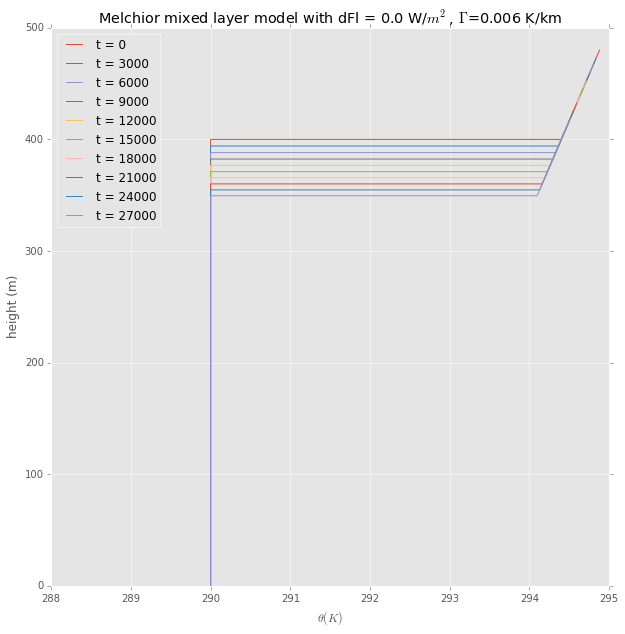

In [5]:
def surf_flux(that):
    u = 7.
    cd = 0.001*(1+0.07*u) # from Melchior
    tnaught = 290.
     
    return(u*cd*(tnaught-that))
    

def dmixed_vars(the_vars,tstep, gamma, dfl):
    """
      derivatives for simple mixed layer, using Melchior (diagnosed delta_theta)
    """
    k=0.2
    rho=1.
    cp=1004.
    D = 5e-6


    derivs=np.empty_like(the_vars)
    F0 = surf_flux(the_vars[0])
    
    delta_theta = (292 + gamma*the_vars[1]) - the_vars[0]

    we = k*F0/delta_theta 
    #print("we = {}".format(we))

    wh = -D*the_vars[1]
    #print("wh = {}".format(wh))
    
    derivs[0]=1/the_vars[1]*(F0 + we*delta_theta - 1/(cp*rho)*dfl) # from Melchior
    derivs[1] = we + wh # from Melchior
    
    return derivs

def make_prof(df_out,gamma):
    #
    #  construct a vertical (theta, height) profile with the correct Delta theta jump
    #  using four points
    #
    profile=[(df_out['theta'],0),
             (df_out['theta'],df_out['h']),
             (df_out['theta'] + df_out['deltheta'],df_out['h']),
             (df_out['theta'] + df_out['deltheta'] + gamma*0.2*df_out['h'],1.2*df_out['h'])]
    xvals=[item[0] for item in profile]
    yvals=[item[1] for item in profile]
    return xvals,yvals



dtout=10.  #minutes
tf=8  #hours
dtout=dtout*60.
tf=tf*3600.
tspan = np.arange(0.,tf,dtout)
vars_init=[290.,400,0.5]  #theta (K), height (m), del theta (K) to start
gamma=6e-3  #K/m
dfl = 0.                   

#F0 = 60 #W/m^2
#wh= 0.  #m/s

output=integrate.odeint(dmixed_vars, vars_init, tspan, (gamma, dfl))
result=pd.DataFrame.from_records(output,columns=['theta','h','deltheta'])
result['time']=tspan
result['deltheta']=(292 + gamma*result['h']) - result['theta'] # replicate delta theta in output
out=result.to_dict(orient='records')
#print(result)
plt.close('all')
plt.style.use('ggplot')
fig,ax = plt.subplots(1,1,figsize=(10,10))
for count,row in enumerate(out):
    if np.mod(count,5) == 0:
        thetavals,heightvals=make_prof(row,gamma)
        ax.plot(thetavals,heightvals, label="t = {}".format(int(result['time'][count])))
        
ax.legend(loc='best')

#
# note that the title tuple concatenates the two lines together if
# the aren't separated by a comma
#
out=ax.set(xlim=(288,295),xlabel=r'$\theta (K)$',ylabel='height (m)',
          title=('Melchior mixed layer model with'
                 ' dFl = {} W/$m^2$, $\Gamma$={} K/km').format(dfl,gamma))

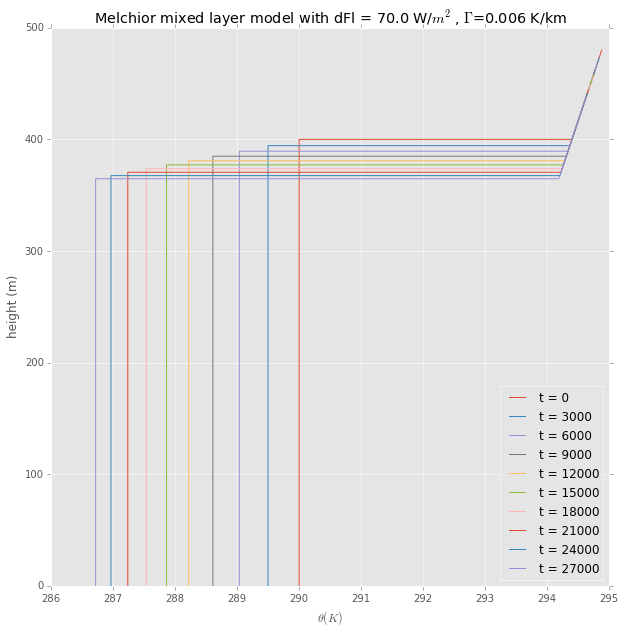

In [6]:
dtout=10.  #minutes
tf=8  #hours
dtout=dtout*60.
tf=tf*3600.
tspan = np.arange(0.,tf,dtout)
vars_init=[290.,400,0.5]  #theta (K), height (m), del theta (K) to start
gamma=6e-3  #K/m
dfl = 70.                   

#F0 = 60 #W/m^2
#wh= 0.  #m/s

output=integrate.odeint(dmixed_vars, vars_init, tspan, (gamma, dfl))
result=pd.DataFrame.from_records(output,columns=['theta','h','deltheta'])
result['time']=tspan
result['deltheta']=(292 + gamma*result['h']) - result['theta'] # replicate delta theta in output
out=result.to_dict(orient='records')
#print(result)
plt.close('all')
plt.style.use('ggplot')
fig,ax = plt.subplots(1,1,figsize=(10,10))
for count,row in enumerate(out):
    if np.mod(count,5) == 0:
        thetavals,heightvals=make_prof(row,gamma)
        ax.plot(thetavals,heightvals, label="t = {}".format(int(result['time'][count])))
        
ax.legend(loc='best')

#
# note that the title tuple concatenates the two lines together if
# the aren't separated by a comma
#
out=ax.set(xlim=(286,295),xlabel=r'$\theta (K)$',ylabel='height (m)',
          title=('Melchior mixed layer model with'
                 ' dFl = {} W/$m^2$, $\Gamma$={} K/km').format(dfl,gamma))

With $dF_L > 70\ Wm^{-2}$, the profile does seem to reach an equilibrium; whereas with $dF_L = 0$, the boundary layer just keeps shrinking because |wh| > |we|